In [1]:
import pickle
from entities.games import GameShow
from collections import defaultdict
from typing import List
import numpy as np
import matplotlib.pyplot as plt

dark_pink = '#ed1b76'
pink = '#f44786'
blue = 	'#249f9c'
dark_blue = '#037a76'

In [2]:
with open('simulation.pkl', 'rb') as f:
    game_shows = pickle.load(f)

In [3]:
game_shows[-1]

GameShow
self.num_players=456, 
self.num_active=13, 
self.num_eliminated=443, 
self.survival_ratio=0.03
self.prize_pool=443,000,000€
self.prize_per_player=34,076,923€

In [4]:
game_names = []
for i, g in enumerate(game_shows[-1].games_played, start=1):
    print(f'Game {i}) {g}')
    game_names.append(type(g).__name__)

Game 1) RedLightGreenLight: self.num_players=456, self.num_active=272, self.num_eliminated=184, self.survival_ratio=0.60
Game 2) SugarHoneycombs: self.num_players=272, self.num_active=134, self.num_eliminated=138, self.survival_ratio=0.49
Game 3) TugOfWar: self.num_players=134, self.num_active=70, self.num_eliminated=64, self.survival_ratio=0.52
Game 4) Marbles: self.num_players=70, self.num_active=35, self.num_eliminated=35, self.survival_ratio=0.50
Game 5) GlassStones: self.num_players=35, self.num_active=26, self.num_eliminated=9, self.survival_ratio=0.74
Game 6) SquidGame: self.num_players=26, self.num_active=13, self.num_eliminated=13, self.survival_ratio=0.50


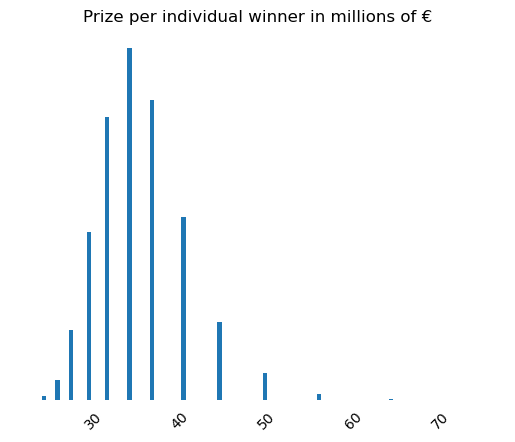

In [23]:
fig, ax = plt.subplots(1, 1)
ax.hist([game_show.prize_per_player / 1_000_000 for game_show in game_shows], bins=100, density=True)
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_ticks_position('none')
ax.set_title('Prize per individual winner in millions of €')
ax.axes.get_yaxis().set_visible(False)
plt.box(False)
plt.show()

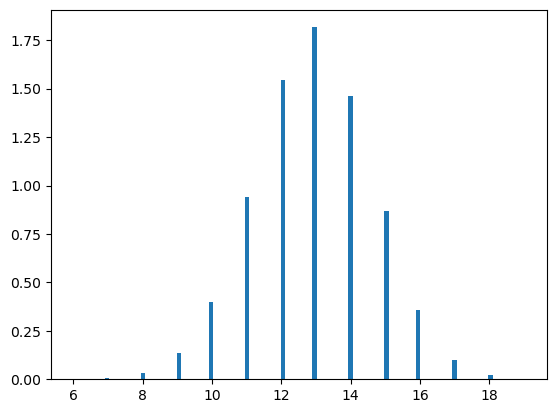

In [5]:
plt.hist([game_show.num_active for game_show in game_shows], bins=100, density=True)
plt.show()

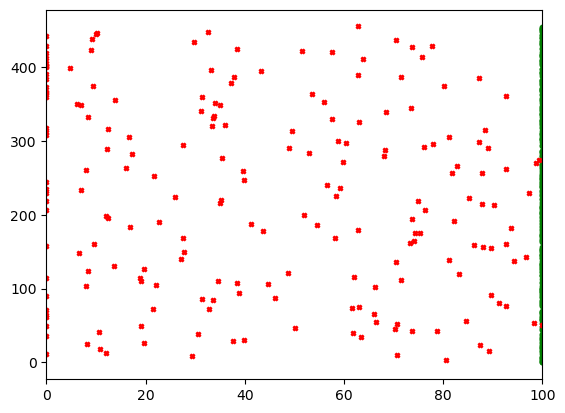

In [6]:
game_shows[0].games_played[0].plot_game()

* Animation of RLGL
* Animation of Glass Stones
* Statistics per Game:
  * vertical with confidence bands
* Odds of survival

In [7]:
alive_per_sim = np.array([[g.num_active for g in gs.games_played] for gs in game_shows])[:300,:].T
alive_per_sim = np.insert(alive_per_sim, 0, 456, axis=0)

In [8]:
alive_per_sim_avg = np.mean(alive_per_sim, axis=1)

C:\Users\dylan\AppData\Local\Temp\ipykernel_44916\1900726972.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([None, 'Initial'] + game_names)


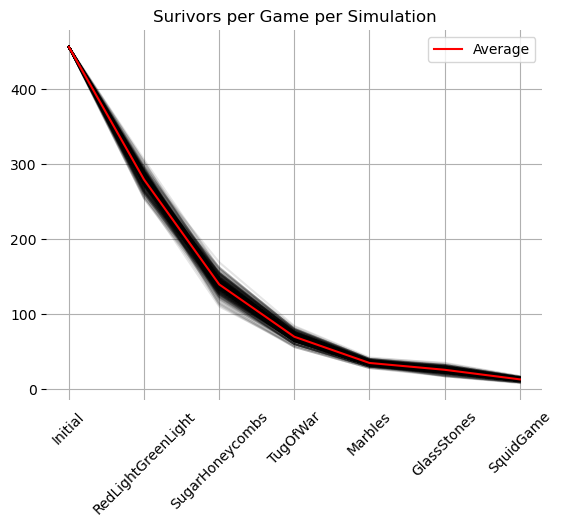

In [9]:
fig, ax = plt.subplots(1, 1)
ax.plot(alive_per_sim, alpha=0.1, color='black')
ax.plot(alive_per_sim_avg, color='red', label='Average')
ax.set_xticklabels([None, 'Initial'] + game_names)
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_ticks_position('none')
ax.grid(axis='y')
ax.grid(axis='x')
ax.set_title('Surivors per Game per Simulation')
plt.box(False)
plt.legend()
plt.show()

In [10]:
surival_rate_per_game = defaultdict(list)
for gs in game_shows:
    for i, game in enumerate(gs.games_played):
        surival_rate_per_game[type(game).__name__].append(game.survival_ratio)

In [11]:
conf_per_game = {}
for game_name, ratios in surival_rate_per_game.items():
    conf_per_game[game_name] = {
        'mean': np.mean(ratios),
        'std': np.std(ratios),
    }

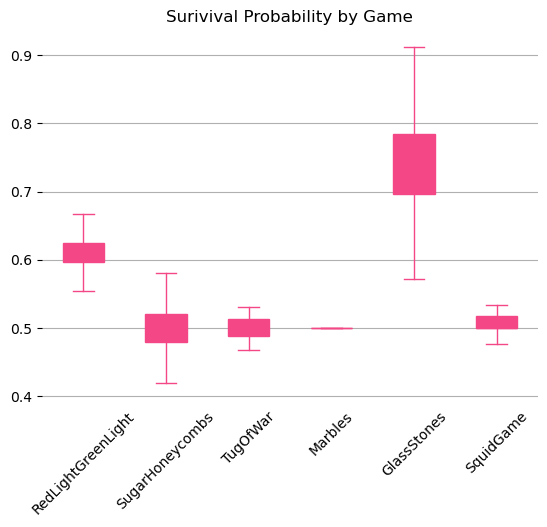

In [12]:
fig, ax = plt.subplots()

ax.boxplot(
    [v for v in surival_rate_per_game.values()], 
    tick_labels=game_names,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=pink, color=pink),
    capprops=dict(color=pink),
    whiskerprops=dict(color=pink),
    flierprops=dict(color=pink, markeredgecolor=pink),
    medianprops=dict(color=pink),
)

plt.box(False)
ax.grid(axis='y')
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_ticks_position('none')
ax.set_title('Surivival Probability by Game')
plt.show()

C:\Users\dylan\AppData\Local\Temp\ipykernel_44916\2198806119.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(game_names)


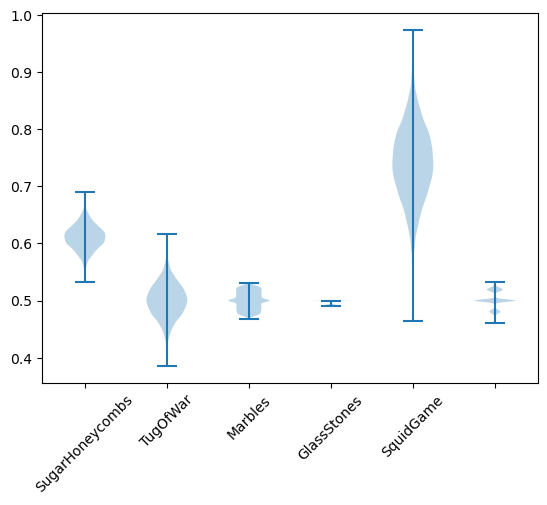

In [13]:
fig, ax = plt.subplots()
ax.violinplot(
    [v for v in surival_rate_per_game.values()], 
)
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(game_names)
plt.show()